f0: 2.5
fs: 170
N: 68.0
Ts: 0.4
lcm: 10.0


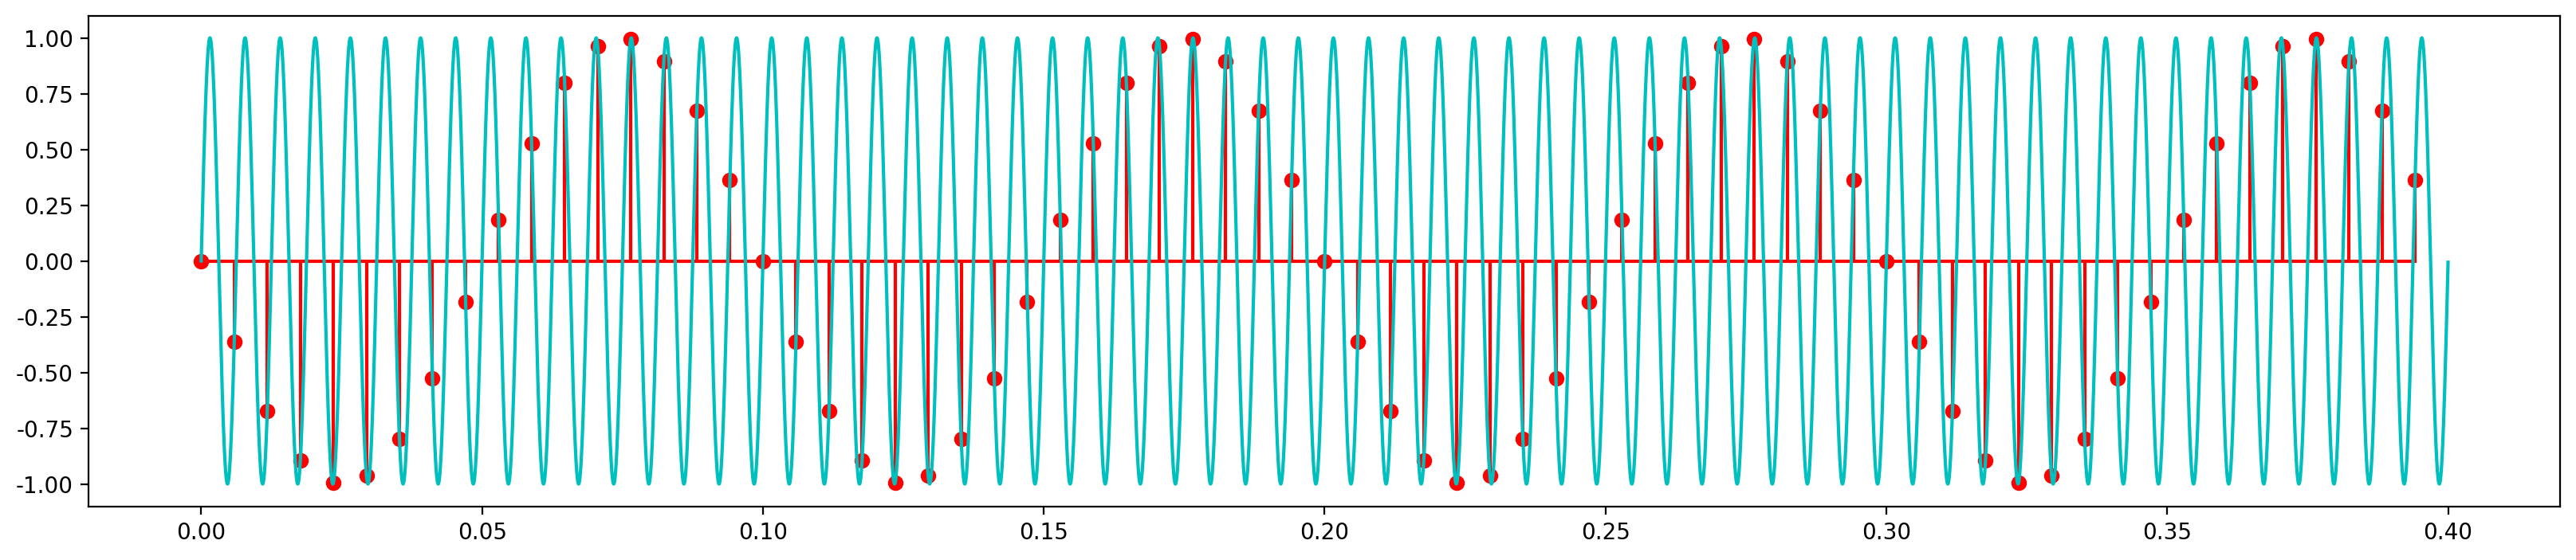

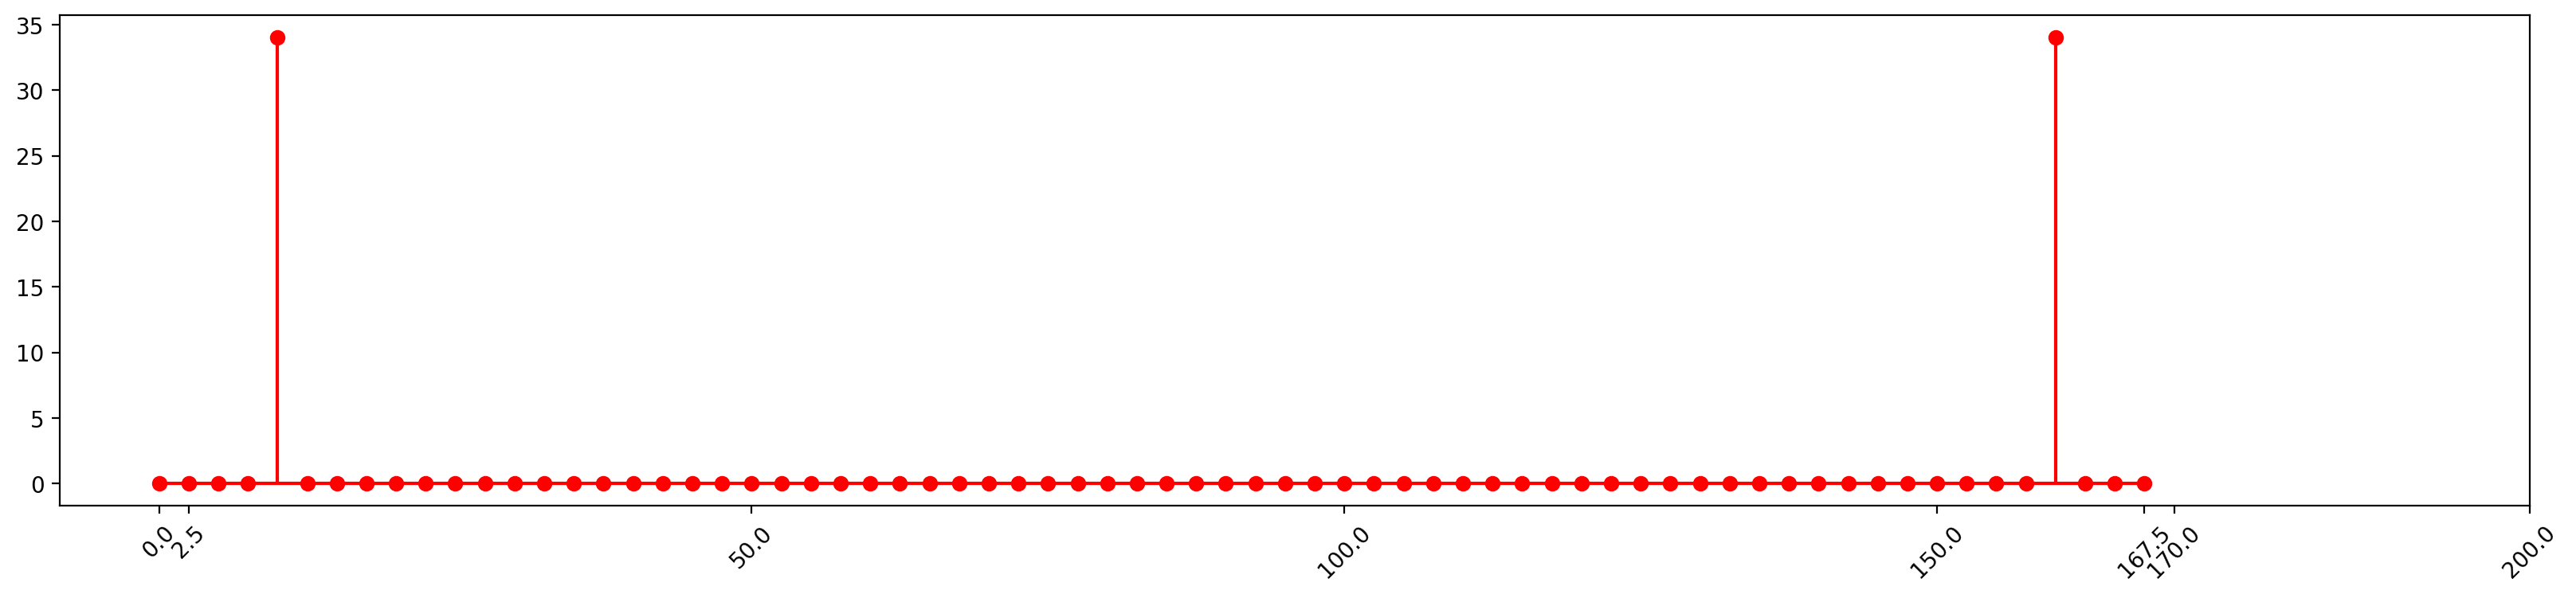

In [10]:
from pylab import *
rcParams['font.family'] = 'DejaVu Sans'
rcParams['figure.dpi'] = 200
rcParams['figure.figsize'] = 20,4


def Lcm(fs, f):
    # 如果lcm(fs,f)/fs和lcm(fs,f)/f都是整数，那么返回1/(lcm(int(lcm(fs,f)/(fs)),int(lcm(fs,f)/(f)))/lcm(fs,f)),否则报错
    if lcm(fs, f) % fs == 0 and lcm(fs, f) % f == 0:
        return lcm(fs, f) / lcm(int(lcm(fs, f) / (fs)), int(lcm(fs, f) / (f))) 
    else:
        raise ValueError('Cannot find a valid lcm')
    

fs = 170
f = 160
Ts = 0.4
ts = arange(0, Ts, 1/fs)
t = arange(0, Ts, 0.001/fs)
xs = np.sin(2*np.pi*f*ts)
# xs = np.random.normal(0, 1, len(ts))  # Generate Gaussian noise
xs_nminus1 = np.roll(xs, 20)
x = np.sin(2*np.pi*f*t)  # Use sympy's sin for symbolic expressions
fig = figure()
ax = fig.add_subplot(111)
f0 = 1/Ts
N = Ts*fs
fx = arange(0, f0*N,f0)
print(f'f0: {f0}')
print(f'fs: {fs}')
print(f'N: {N}')
print(f'Ts: {Ts}')
ax.stem(ts, xs, 'r', markerfmt='ro', basefmt='r-')
# ax.stem(ts, xs_nminus1, 'g', markerfmt='go', basefmt='g-')
ax.plot(t, x, 'c-')
y = np.fft.fft(xs)
y_nminus1 = np.fft.fft(xs_nminus1)
fig = figure()
ax = fig.add_subplot(111)
ax.stem(fx, abs(y), 'r', markerfmt='ro', basefmt='r-', linefmt='r-')
# ax.stem(fx, abs(y_nminus1), 'g', markerfmt='go', basefmt='g-', linefmt='g-')
print(f'lcm: {Lcm(fs, f)}')
# Concatenate the arrays properly
xticks = np.concatenate([ax.get_xaxis().get_majorticklocs()[1::2], [f0, fs,fs-f0]])
ax.set_xticks(xticks)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

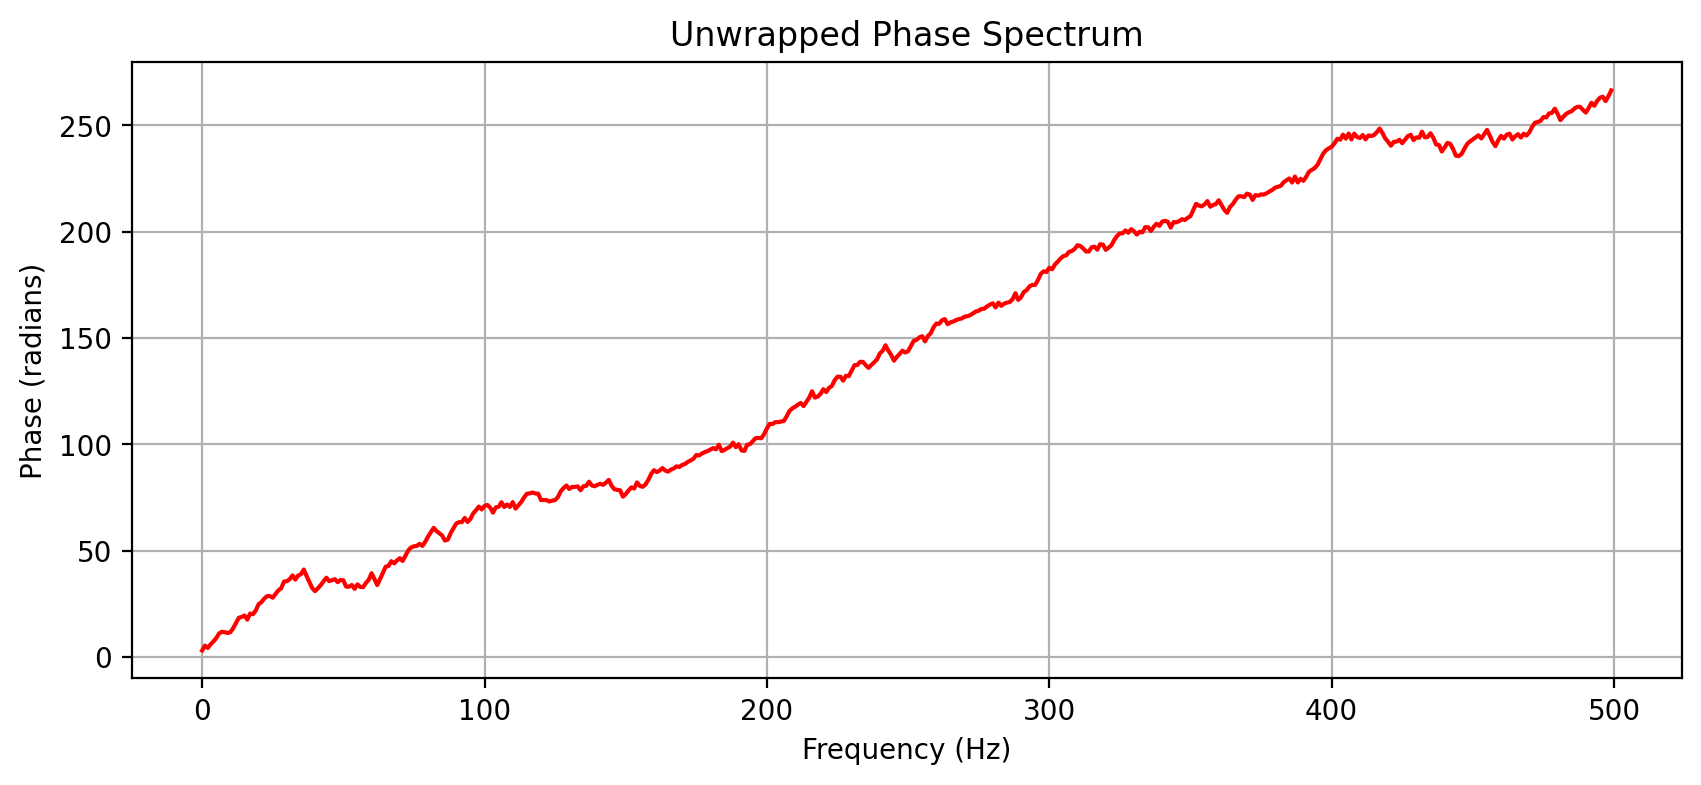

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例信号
fs = 1000           # 采样率
t = np.linspace(0, 1, fs, endpoint=False)
x = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)

# 计算FFT
Y = np.fft.fft(x)
N = len(Y)
freq = np.fft.fftfreq(N, 1/fs)  # 生成频率轴[[7]]

# 提取相位
phase_rad = np.angle(Y)          # 原始相位[[2]]
phase_unwrapped = np.unwrap(phase_rad)  # 解卷绕相位[[10]]

# 绘制相位谱
plt.figure(figsize=(10, 4))
plt.plot(freq[:N//2], phase_unwrapped[:N//2], 'r')  # 仅显示正频率部分
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('Unwrapped Phase Spectrum')
plt.grid()
plt.show()